In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

In [30]:
# Load dataset
df = pd.read_csv("../data/output/tfidf_dataset.csv")

In [31]:
print(df['cyberbullying'].value_counts())
# print(df['label'].value_counts())
df.head()

cyberbullying
0    16225
1    16225
Name: count, dtype: int64


,10th,12th,15th,16th,1960s,19th,19th century,1px,1px solid,1st,...,zealand,zero,zionist,zoe,zone,zoo,zuck,zuckerberg,ŷour,cyberbullying
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
X = df.drop(columns=['cyberbullying'])  # features from tf-idf
y = df['cyberbullying']                 # target label

svd = TruncatedSVD(n_components=300, random_state=42)
X_reduced = svd.fit_transform(X)


In [33]:
# train and test with 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
# k-fold CV using MLP classifier (feedforward neural network)
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'logistic'],
    'max_iter': [300]
}

grid_search = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best params: {grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'activation': 'logistic', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 300}


In [ ]:
train_acc = grid_search.score(X_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

# Test accuracy
test_acc = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8860



Test Accuracy: 0.8846
Test F1 Score (macro): 0.8845

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3245
           1       0.91      0.85      0.88      3245

    accuracy                           0.88      6490
   macro avg       0.89      0.88      0.88      6490
weighted avg       0.89      0.88      0.88      6490



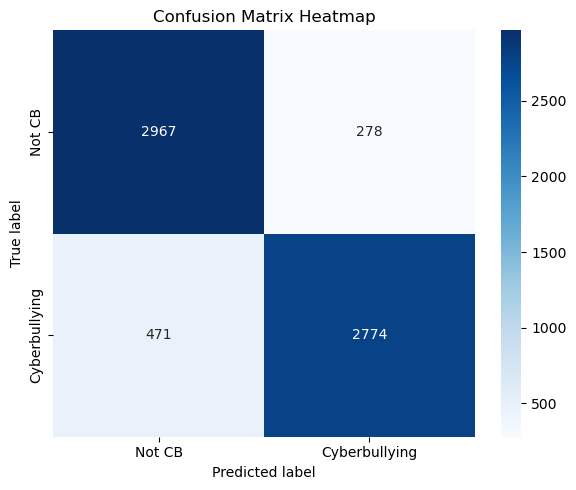

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display metric scorescores
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Not CB", "Cyberbullying"], yticklabels=["Not CB", "Cyberbullying"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()